In [20]:
"""
Created on Thu Oct  9 17:25:37 2025

@author: Sarah Straw

"""

#====================================================================
#Imports

import numpy as np
from numpy.linalg import eigh as eigh
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.special import hermite
from math import factorial

#====================================================================
# Functions


def energy_conversion_QHO(eigenvalues, w):
    """
    Function to convert energy from dimensionless units to eV
    from equation E = E' * 1/2 * HBAR * w
    -----------
    eigenvalues: energy eigenvalues E' from matrix H which are dimensionless
    w: angular frequency in units rad s**(-1)
    -----------
    returns: energy E in units eV
    """
    E_joules = eigenvalues * 1/2 * HBAR * w
    
    E_eV = E_joules / e_charge
    
    return E_eV

def theory_energy(n, w):
    """
    Function to calculate energy eigenvalue fron energy level n from eq:
        E_n = (n + 1/2)*HBAR*w
        
    Parameters
    -----------
    n: quantum number
    w: angular frequency in units rad s**(-1)
    
    Returns
    -----------
    E: theoretical energy value in eV
    """
    E = (n+0.5)*HBAR*w / e_charge
    return E

def hydrogen_energy_eV(n):
    """
    Function to calculate energy level values for hydrogen fron energy level n from eq:
        E_n = (n + 1/2)*HBAR*w
        
    Parameters
    -----------
    n: quantum number
    
    Returns
    -----------
    E: theoretical hydrogen energy value in eV
    """
    E = -13.605693 / n**2    
    return E

def electron_degeneracy(n):
    """
    Computes electron degeneracy for a given quantum energy level E_n.

    Parameters
    ----------
    n : quantum number for which E_n is the degererate energy value

    Returns
    -------
    degeneracy : number of electrons which hold E_n energy in their orbits

    """
    degeneracy = 0
    for l in range(n):
        degeneracy += 2*(2*l+1)
    return degeneracy

def V_matrix(N, x, l):
    """
    Produces a potenial matrix V for the hydrogen atom, of which the eigenvalues 
    are the potential at the certain x point from the centre of the nucleus.

    Parameters
    ----------
    N : Number of points along x to evaluate V at
    x : Array of distance x values from the centre, of which there are N
    l : quantum angular momentum number, determining the orbital potential

    Returns
    -------
    NxN potential matrix 

    """
    V= np.zeros((N,N))
    for i in range(N):
        V[i,i] = -2/x[i] + l*(l+1)/x[i]**2
    return V

def H_matrix(N, dx, V):
    """
    Produces Hamiltonian matrix H for which the eigenvalues are energy 
    observables in units specified by the system using the discrete 
    approximation of the 2nd derivative
    
    Parameters
    ----------
    N : Number of points along x to evaluate H at
    dx : small change in x
    V : Potential matrix of sixe NxN

    Returns
    -------
    NxN Haniltonian matrix 

    """
    D = np.zeros((N,N))

    for i in range(N):
        D[i,i] = 2 / dx**2
        D[i, i-1] = -1 / dx**2
        if i < N-1:
            D[i, i+1] = -1 / dx**2
    
    H = D + V
    return H

def QHO(N, xmin, xmax):
    """
    Builds the Hamiltonian for the Quantum Harmonic Oscillator and solves for it's energy eigenvalues and eigenvectors,
    storing them in lists.
    
    Parameters
    ----------
    N : Number of points along x to evaluate at
    xmin: start point of x
    xmax: end point of x

    Returns
    -------
    all_energy_levels: array of N energy eigenvalues in units eV
    eigenvectors: array of NxN with each row being a energy eigenvector
    x: aray of spacial points
    dx: gap in space between spacial points
    """

    x = np.linspace(xmin, xmax, N)
    dx = x[1] - x[0]

    V = np.zeros((N,N))
    for i in range(N):
        V[i,i] = x[i]**2

    H = H_matrix(N, dx, V)

    # solving H matrix for its energy eigenvectors and eigenvalues
    eigenvalues, eigenvectors = eigh(H)

    all_energy_levels = energy_conversion_QHO(eigenvalues, w)
    
    return all_energy_levels, eigenvectors, x, dx
    
def hydrogen(N, x_max, dx, orbitals):
    """
    Creates potential matrix, D matrix and therefore the Hamiltonian H matrix
    for a hydrogen atom for each quantum angular momentum value l from l=0 to 
    l = orbitals - 1, then solves for the energy eigenvalues and wavefunctions
    sorting them in lists.

    Parameters
    ----------
    N : Number of points along x to evaluate at
    x_max : maximum radius from the nucleus to evaluate at
    dx : gap between x=0 and x_min where evaluation begins, to avoid evaluating
        at x=0
    orbitals : quantum angular momentum number l, solving H for each value from
        l=0 to l= orbitals - 1

    Returns
    -------
    V_l_list: List of V matricies in order of l=0 first
    H_eigenvalues_list: list of arrays of energy eigenvalues for each H matrix 
        in order of l=0 first, N eigenvalues for each array
    H_eigenvectors_list: list of arrays of energy eigenvectors, each being
        size NxN
    x: x array
    """
    x = np.linspace(0, x_max, N) # evaluating 300 points from 0 to 5a0 from the nucleus 
    dx_t = x[1] - x[0]

    x += dx      
    # shuffled x_t up by dx in order to avoid plotting y=0 as this will be -infinite or +infinate potential

    V_l_list = []
    H_list = []
            
    H_eigenvalues_list = []
    H_eigenvectors_list = []
            
    # looping over the values of l, each one producing a different V and therefore H matrix
    for l in range (orbitals):
                
        # calculating a V matrix for each value of l
        V_l = V_matrix(N, x, l)
        V_l_list.append(V_l)
                
        # each V_l matrix then produces a different H_l matrix
        H_l = H_matrix(N, dx_t, V_l) 
        H_list.append(H_l)
                
        # solving for the eigenvalues and eigenvectors for each H_l matrix
        eigenvalues_l, eigenvectors_l = eigh(H_l)
                
        # storing eigen values and vectors 
        H_eigenvalues_list.append(eigenvalues_l)
        H_eigenvectors_list.append(eigenvectors_l)
        
    return V_l_list, H_eigenvalues_list, H_eigenvectors_list, x, dx_t
            
def wavefunc_plot(l, num):
    """
    Creates a plot of the first 'num' energy wavefunctions in colour order for
    l=l

    Parameters
    ----------
    l : Quantum angular momentum
    colour : colour array
    num : number of wavefunctions to plot

    """
    colors_array_2 = cm.rainbow(np.linspace(0, 1, num+2)) 
    orbital = ("s", "p", "d", "f", "g")

    for i in range(num):
        plt.plot(x_t, (norm_wavefuncs_H[i+l*10]), linewidth=1.4, color = colors_array_2[i+1], label=f"{i+1+l}{orbital[l]}")
        plt.title(f"Hydrogen Energy Wavefunctions for l={l}")
        plt.xlabel("r / a0")
        plt.ylabel("Wavefunction Amplitude")
    plt.legend()

def prob_density(l, num):
    """
    Creates a plot of the first 'num' energy wavefunctions**2 in colour order for l=l, this being probability density. 
    Also plots total probability density line, of sum over first 'num' wavefunctions

    Parameters
    ----------
    l : Quantum angular momentum
    colour : colour array
    num : number of wavefunctions to plot

    """

    orbital = ("s", "p", "d", "f", "g")
    
    # plot of top 'num' wavefunctions squared
    for i in range(num):
        plt.plot(x_t, (norm_wavefuncs_H[i+l*10])**2, linewidth=1.4, color = colors_array_2[i+1], label=f"{i+1+l}{orbital[l]}")
    plt.legend()
    plt.title(f"Hydrogen Probability Density for l={l}")
    plt.xlabel("r / a0")
    plt.ylabel("Probability Amplitude")

    # total probability density line plotting
    norm_wavefuncs_2D = np.vstack(norm_wavefuncs_H)

    prob_den_l0 = np.sum(norm_wavefuncs_2D[l*10:((l*10)+10),:]**2, axis=0)
    plt.plot(x_t, prob_den_l0, color=colors_array_2[0],linestyle='-', alpha=0.3, label="total")
    plt.legend()




In [6]:
#====================================================================
# Main Code


e_charge = 1.602176634e-19 
HBAR = 1.0545718e-34
w = 1e10
m_e = 9.1093837e-31 
eps_0 = 8.854e-12
e =  2.71828
a0 = 4*np.pi*eps_0*HBAR**2 / m_e*e**2 # Bohr radius


In [197]:
#====================================================================
# Part 1 - Quantum Harmonic Oscillator

N=3000 
# CHANGES FROM 10 TO 20
xmax = 20
xmin = - xmax

all_energy_levels, eigenvectors, x, dx = QHO(N, xmin, xmax)


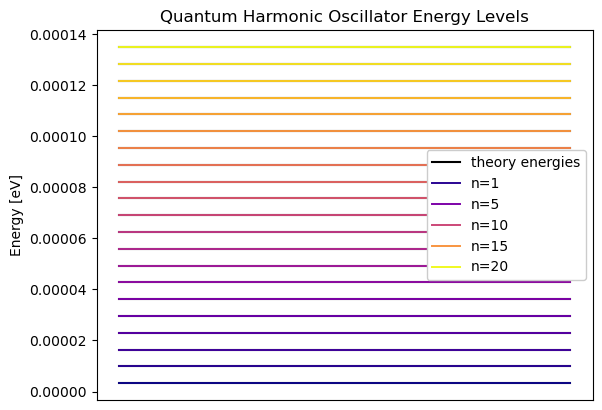

In [198]:
#====================================================================
# Quantum Harmonic Oscillator Energy Levels Plot

num_plot_lev = 21 # number of energy levels to plot

colors_array_7 = cm.plasma(np.linspace(0, 1, num_plot_lev)) 

# plotting theoretical energy
for i, n in enumerate(range(num_plot_lev)):
    if i==1:
        E_theory = theory_energy(n, w)
        plt.plot([-1,1], [E_theory,E_theory], color = 'black', label=f"theory energies")
    else:
        E_theory = theory_energy(n, w)
        plt.plot([-1,1], [E_theory,E_theory], color = 'black')

# overaying with computed energy eigenvalues
for i, E in enumerate(all_energy_levels[0:num_plot_lev]):
    if i in (1, 5, 10, 15, 20):
        plt.plot([-1, 1], [(E), (E)], linewidth=1.4, color = colors_array_7[i], label=f'n={i}')
    else:
        plt.plot([-1, 1], [(E), (E)], linewidth=1.4, color = colors_array_7[i])

plt.ylabel('Energy [eV]')
plt.xticks([])  
plt.legend(loc='center right', bbox_to_anchor=(1, 0.5),  framealpha=1.0)
plt.title('Quantum Harmonic Oscillator Energy Levels')
plt.savefig("QHO_energy_levels_.png", bbox_inches="tight")
plt.show()

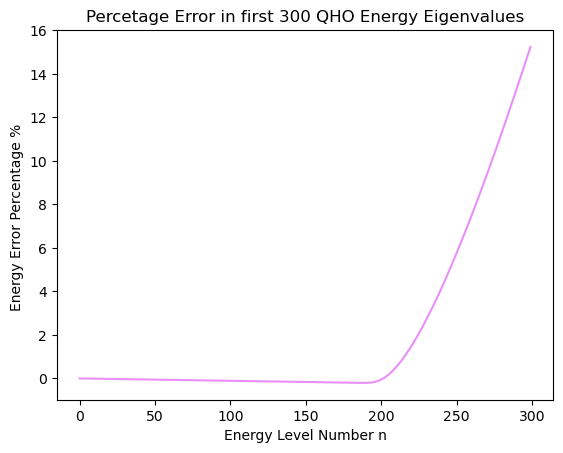

In [199]:
#====================================================================
# Quantum Harmonic Oscillator Energy Levels Error Plot

error_total = 0
error = []
error_percentage = []
num = 300

for i in range(num):
    E_theory = theory_energy(i, w)
    E_computed = all_energy_levels[i]

    error_ = E_computed - E_theory
    error_total+=error_

    error.append(error_)

    error_percentage.append(( error_ / E_theory)*100)


plt.plot(range(num), error_percentage, color = '#EA8FFA')
plt.title(f"Percetage Error in first {num} QHO Energy Eigenvalues")
plt.xlabel('Energy Level Number n')
plt.ylabel('Energy Error Percentage % ')
plt.savefig("QHO_E_error.png", bbox_inches="tight")
plt.show()

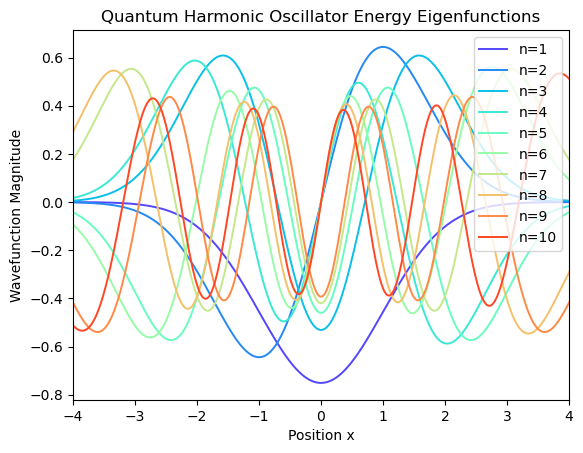

In [200]:
#====================================================================
# Quantum Harmonic Oscillator Energy Eigenfunctions

# number of energy eigenvectors to plot
num_plot_phi = 10

# splitting a colour map into discrete colours to assign to consecutive eigenvectors
colors_array_2 = cm.rainbow(np.linspace(0, 1, num_plot_phi+2))  

norm_wavefuncs_QHO = []

# normalising the wavefunctions
for i in range(num_plot_phi):  # looping over the first (num_plot_phi) eigenfunctions 
    norm = eigenvectors[:,i] / np.sqrt( np.sum((np.abs(eigenvectors[:,i])**2)*dx) ) # dividing by calculated norm constant
    # storing the first ten normalised wavefunctions
    norm_wavefuncs_QHO.append(norm)

for i in range(num_plot_phi):
    plt.plot(x, norm_wavefuncs_QHO[i], linewidth=1.4, color = colors_array_2[i+1], label=f"n={i+1}")
    
plt.ylabel('Wavefunction Magnitude')
plt.xlabel('Position x')
plt.xlim(-4, 4)  
plt.legend(loc ='upper right')
plt.title('Quantum Harmonic Oscillator Energy Eigenfunctions')
plt.savefig("QHO_wavefunctions.png", bbox_inches="tight")
plt.show()

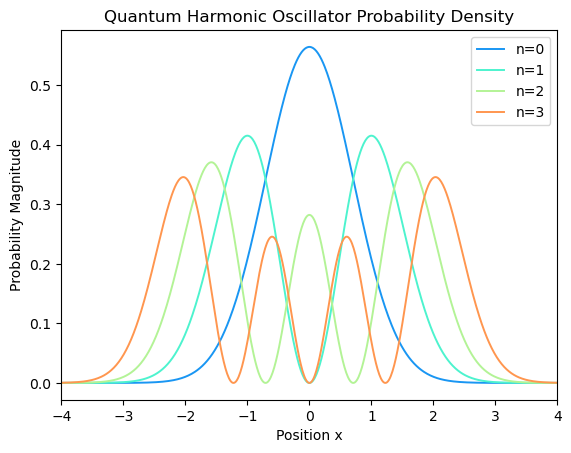

In [205]:
#====================================================================
# QHO Probabiliy Density Plot

num_plot_prob = 4
colors_array_5 = cm.rainbow(np.linspace(0, 1, num_plot_prob+2))  

for i in range(num_plot_prob):
    plt.plot(x, (norm_wavefuncs_QHO[i])**2, linewidth=1.4, color = colors_array_5[i+1], label=f"n={i}")
    
plt.ylabel('Probability Magnitude')
plt.xlabel('Position x')
plt.legend()
plt.xlim(-4, 4)  # zooming into where x is -3 to 3 
plt.title('Quantum Harmonic Oscillator Probability Density')
plt.savefig("QHO_wavefunctions_prob.png", bbox_inches="tight")
plt.show()

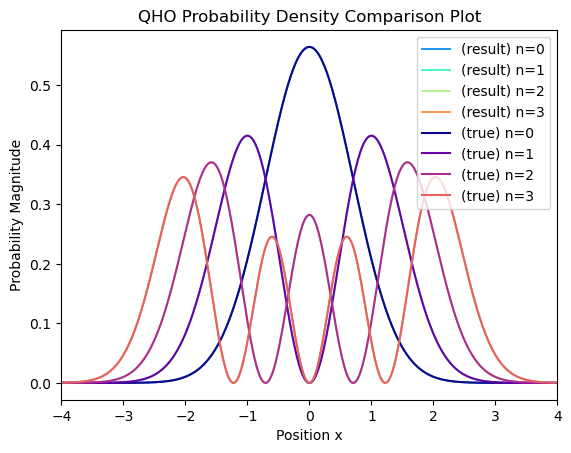

In [206]:
#====================================================================
# copiolet generated code + my editing for QHO wavefunction comparison

xi = np.sqrt(m_e*w/HBAR) * x
xi = np.linspace(-4, 4, N)

def qho_wavefunction(n, xi):
    prefactor = 1.0 / np.sqrt((2**n) * factorial(n)) * (1/np.pi)**0.25
    Hn = hermite(n)(xi)
    return prefactor * Hn * np.exp(-xi**2/2)
xi = np.linspace(-4, 4, N)
colors_array_6 = cm.plasma(np.linspace(0, 1, num_plot_prob+2))  


for i in range(num_plot_prob):
    plt.plot(x, (norm_wavefuncs_QHO[i])**2, linewidth=1.4, color = colors_array_5[i+1], label=f"(result) n={i}")

for n in range(4):
    plt.plot(xi, (qho_wavefunction(n, xi))**2, color = colors_array_6[n], label=f"(true) n={n}")
    
plt.title("QHO Probability Density Comparison Plot")
plt.ylabel('Probability Magnitude')
plt.xlabel('Position x')
plt.xlim(-4,4)
plt.legend()
plt.savefig("QHO_wavefunctions__prob_true.png", bbox_inches="tight")
plt.show()

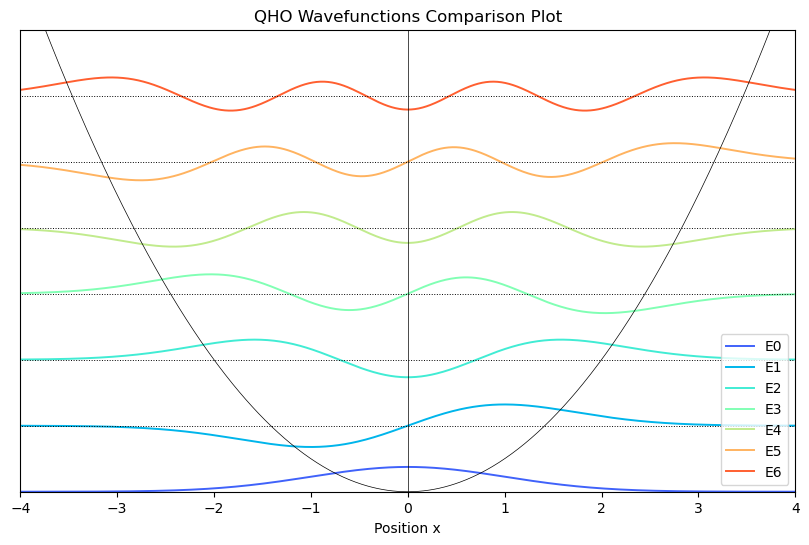

In [208]:
#====================================================================
# QHO wavefunction plot for comparison


QHO_num_compare = 7
colors_array_10 = cm.rainbow(np.linspace(0, 1, QHO_num_compare+2))  

plt.figure(figsize=(10, 6))  
for i in range(QHO_num_compare):
    if i==0:
        plt.plot(x, ((norm_wavefuncs_QHO[i])*-1  + 2*i), linewidth=1.4, color = colors_array_10[i+1], label=f"E{i}")
        plt.plot(x, np.ones_like(x)*i*1.5, color = "black", linestyle="--", linewidth=0.5)
    else:
        plt.plot(x, ((norm_wavefuncs_QHO[i])  + 2*i), linewidth=1.4, color = colors_array_10[i+1], label=f"E{i}")
        plt.plot(x, np.ones_like(x)*i*2, color = "black", linestyle=":", linewidth=0.7)
plt.plot(x,x**2, color="black", linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)  
plt.ylim(0,14)
plt.yticks([])
plt.xlim(-4,4)
plt.title('QHO Wavefunctions Comparison Plot')
plt.xlabel('Position x')
plt.legend(loc="lower right")
plt.savefig("QHO_comparison_E6.png", bbox_inches="tight")
plt.show()


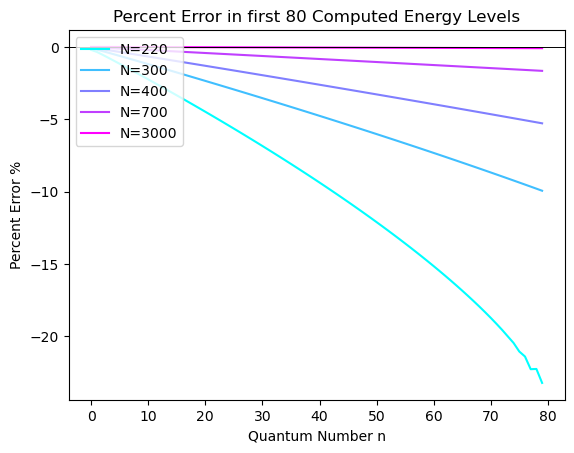

In [220]:
#====================================================================
# Plotting error in energy eigenvaues with x ranging -10 to 10, and N varying

N_array = (220, 300, 400, 700, 3000)
xmax=20
xmin=-xmax
n = 80 # number of eigenvalues to plot
n_array = np.arange(0,n)
colors_array_4 = cm.cool(np.linspace(0, 1, len(N_array)))  

for j, i in enumerate(N_array):   # j = looping index number, i = actual entry in N_array

    all_energy_levels, eigenvectors, x, dx = QHO(i, xmin, xmax)   # recompute for each N
    E_theory = theory_energy(n_array, w) # energy value from theory
    E_calculated = all_energy_levels[:n] # energy value from eigenvalues of H

    percent_error = ((E_calculated - E_theory) / E_theory )*100

    plt.plot(n_array,percent_error, color=colors_array_4[j], label=f'N={i}')
plt.title(f'Percent Error in first {n} Computed Energy Levels')
plt.ylabel('Percent Error %')
plt.legend(loc="upper left")
plt.axhline(y=0, color='black', linewidth=0.7)
plt.xlabel('Quantum Number n')
plt.savefig("QHO_error_N_array.png", bbox_inches="tight")
plt.show()

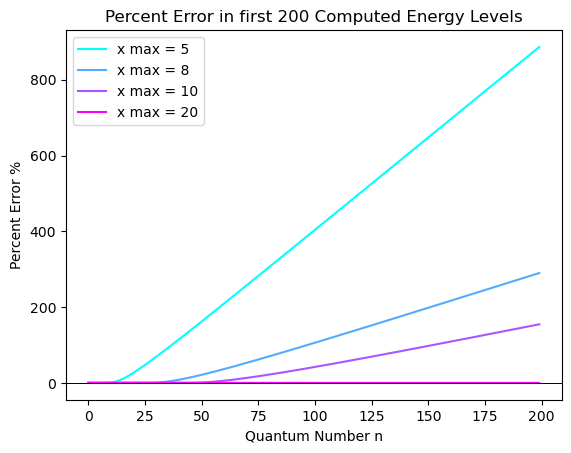

In [215]:
#====================================================================
# Plotting error in energy eigenvaues with N=300 and x range varying

nmax_array = (5, 8, 10, 20) # experimenting with different ranges of distance
N = 3000 # set value of N
n = 200 # number of eigenvalues to plot
n_array = np.arange(0,n)
colors_array_4 = cm.cool(np.linspace(0, 1, len(nmax_array)))  

for j, i in enumerate(nmax_array):   # j = looping index number, i = actual entry in nmax_array

    xmax = i
    xmin = -i # making array of x symmetric about x=0
    
    all_energy_levels, eigenvectors, x, dx = QHO(N, xmin, xmax)   # recompute for each N
    E_theory = theory_energy(n_array, w) # energy value from theory
    E_calculated = all_energy_levels[:n] # energy value from eigenvalues of H

    percent_error = ((E_calculated - E_theory) / E_theory )*100

    plt.plot(n_array,percent_error, color=colors_array_4[j], label=f'x max = {i}')
plt.title(f'Percent Error in first {n} Computed Energy Levels')
plt.ylabel('Percent Error %')
plt.axhline(y=0, color='black', linewidth=0.7)
plt.legend(loc="upper left")
plt.xlabel('Quantum Number n')
plt.savefig("QHO_error_xmax_array.png", bbox_inches="tight")
plt.show()

In [8]:
#====================================================================
# Part 2

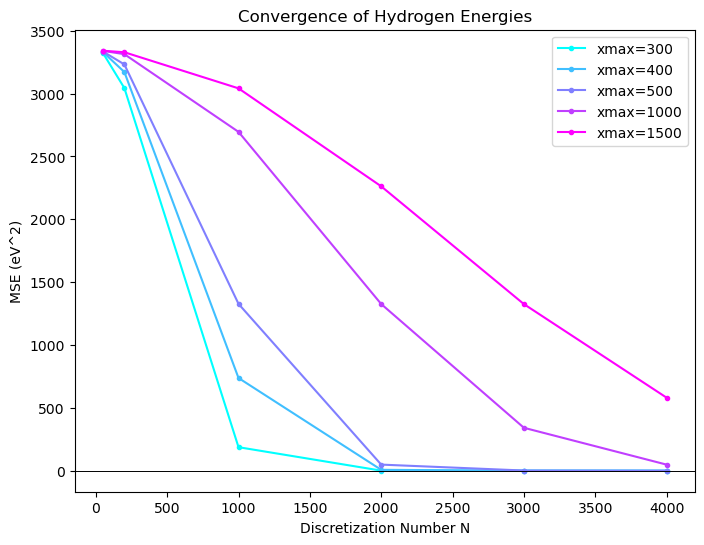

In [10]:
#====================================================================
# Plotting how Discretization effects the accuracy of the hydrogen energy eigenvalues 

orbitals = 1
N_array = (50, 200, 1000, 2000, 3000, 4000) # array of N values
xmax_array = (300, 400, 500, 1000, 1500) # array of max x values
dx = 0.1
n = 20  # number of eigenvalues to evaluate
colors_array_12 = cm.cool(np.linspace(0, 1, len(xmax_array)))  

plt.figure(figsize=(8,6))

for j, xmax in enumerate(xmax_array):
    mse_values = []  
    
    for i in N_array:
        V_l_list, H_eigenvalues_list, H_eigenvectors_list, x_t, dx_t = hydrogen(i, xmax, dx, orbitals)

        n_available = min(len(H_eigenvalues_list[0]), n) # available E_ns what are bound
        E_theory = hydrogen_energy_eV(np.arange(1,n_available+1)) # true energy value from eqs

        E_calculated = H_eigenvalues_list[0][:n_available] * 13.605693

        error = E_calculated - E_theory
        mse = np.mean(error**2)
        mse_values.append(mse)
    
    plt.plot(N_array, mse_values, marker='.', color=colors_array_12[j], label=f"xmax={xmax}")

plt.axhline(y=0, color='black', linewidth=0.7)
plt.xlabel("Discretization Number N")
plt.ylabel("MSE (eV^2)")
plt.title("Convergence of Hydrogen Energies")
plt.legend()
plt.savefig("H_discret_converg.png", bbox_inches="tight")
plt.show()


In [11]:
#====================================================================
# computing eigenvalues and eigenvectors with chosen discretization numbers

N_t = 3000  
x_max = 300
dx = 0.1   
orbitals = 5

V_l_list, H_eigenvalues_list, H_eigenvectors_list, x_t, dx_t =  hydrogen(N_t, x_max, dx, orbitals)

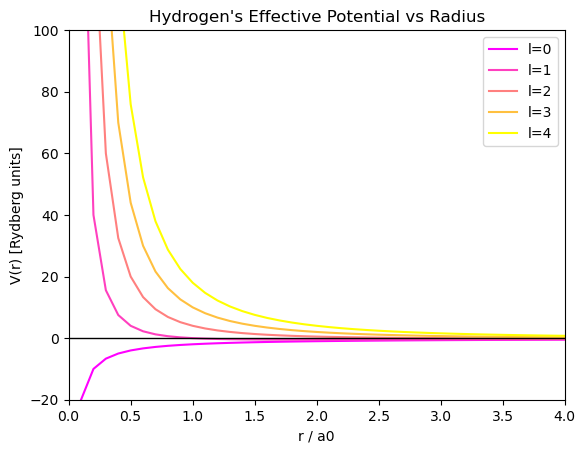

In [12]:
#====================================================================
# Plotting Potential 

V_colors = cm.spring(np.linspace(0, 1, orbitals)) 

for l in range(orbitals):
    plt.plot(x_t, np.diag(V_l_list[l]), color=V_colors[l], label=f"l={l}")
plt.axhline(y=0, color='black', linewidth=1)
plt.ylim(-20, 100)
plt.xlim(0, 4)
plt.xlabel("r / a0")
plt.ylabel("V(r) [Rydberg units]")
plt.title("Hydrogen's Effective Potential vs Radius")
plt.legend()
plt.savefig("H_potential.png", bbox_inches="tight")
plt.show()

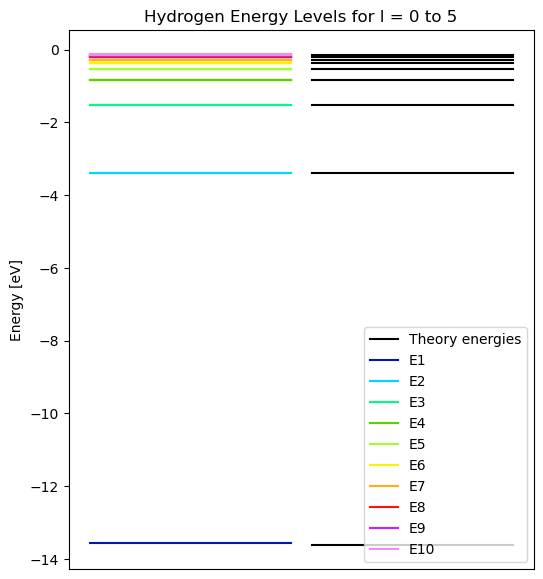

In [24]:
#====================================================================
# Plotting energy levels against theoretical values 

orbitals = 5
num_plot_lev_H = 10
colors_array_9 = cm.gist_ncar(np.linspace(0, 1, num_plot_lev_H+2))

H_energies_eV = []

for l in range(orbitals):
    H_energies_eV.append( (H_eigenvalues_list[l][:num_plot_lev_H-l])*13.605693)
    # H_energies_eV is a nested list of E_n=1 to E_n=(num_plot_lev_H) for each l

plt.figure(figsize=(6,7))

# Plot theoretical energies as horizontal lines
for n in range(1, num_plot_lev_H+1):
    E_theory = hydrogen_energy_eV(n)
    plt.plot([0.05, 1], [E_theory, E_theory], color='black')
plt.plot([], [], color='black', label="Theory energies")  # single legend entry

for l in range(orbitals):
    
    # energies list 
    # l=0: E1, E2, E3 ... E10
    # l=1: E2, E3, E4 ... E10
    # L=l: E(l+1), E(l+2) ... E10    
    # num of En for l=l is 10-l

    # H_energies_eV is made so to have 10-l entries in each list
    
    for n, E_n in enumerate(H_energies_eV[l][:]):
        n_real = n+l+1  # n=0 (first entry) of l=4 is E5
        E = E_n
        if l == 0:
            plt.plot([-1, -0.05], [(E),(E)], color=colors_array_9[n_real], label=f"E{n_real}")
        else:
            plt.plot([-1, -0.05], [(E),(E)], color=colors_array_9[n_real])

plt.xticks([])
plt.ylabel("Energy [eV]")
plt.legend(loc="lower right")
plt.title("Hydrogen Energy Levels for l = 0 to 5")
plt.savefig("Hydrogen_energy_levels.png", bbox_inches="tight")
plt.show()

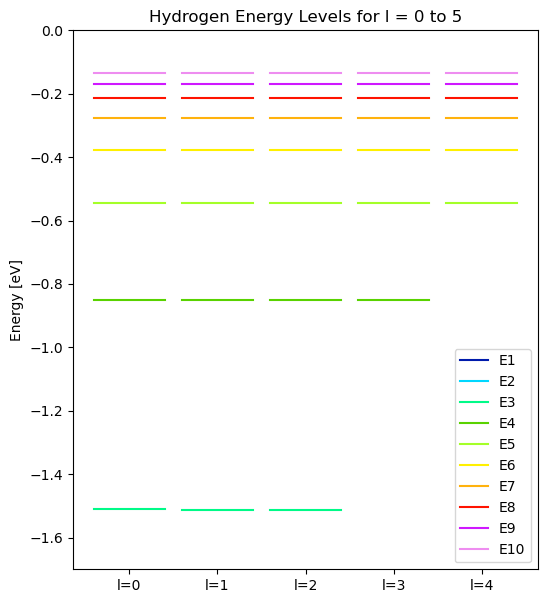

In [25]:
#====================================================================
# magnified plot on higher energy levels

plt.figure(figsize=(6,7))

for l in range(orbitals):
    
    # energies list 
    # l=0: E1, E2, E3 ... E10
    # l=1: E2, E3, E4 ... E10
    # general expression:
    # L=l: E(l+1), E(l+2) ... E10    
    # num of En for l=l is 10-l

    # H_energies_eV is made so to have 10-l entries in each list
    
    for n, E_n in enumerate(H_energies_eV[l][:]):
        
        n_real = n+l+1  # n=0 (first entry) of l=4 is E5
        E = E_n  
        if l == 0:
            plt.plot([l, l+0.8], [(E),(E)], color=colors_array_9[n_real],  label=f"E{n_real}")
        else:
            plt.plot([l, l+0.8], [(E),(E)], color=colors_array_9[n_real],)

plt.ylim(-1.7,0) # zooming into higher energies
plt.xticks([0.4, 1.4, 2.4, 3.4, 4.4], ["l=0", "l=1", "l=2", "l=3", "l=4"])
plt.ylabel("Energy [eV]")
plt.legend(loc="lower right")
plt.title("Hydrogen Energy Levels for l = 0 to 5")
plt.savefig("Hydrogen_energy_levels_mag.png", bbox_inches="tight")
plt.show()

In [26]:
#====================================================================
# mse in energies 

error=0
mse=0
mse_values=[]
orbitals = 5

for l in range(orbitals):
    E_theory = hydrogen_energy_eV(np.arange(1,16)) # energy value from theory
    E_calculated = H_eigenvalues_list[0][:15] * 13.605693

    error = E_calculated - E_theory
    mse = np.mean(error**2)
    mse_values.append(mse)

    print(f"Mean Squared Error in first 15 Energy Levels for l={l}: {mse_values[l]}")


Mean Squared Error in first 15 Energy Levels for l=0: 0.00027873465899631926
Mean Squared Error in first 15 Energy Levels for l=1: 0.00027873465899631926
Mean Squared Error in first 15 Energy Levels for l=2: 0.00027873465899631926
Mean Squared Error in first 15 Energy Levels for l=3: 0.00027873465899631926
Mean Squared Error in first 15 Energy Levels for l=4: 0.00027873465899631926


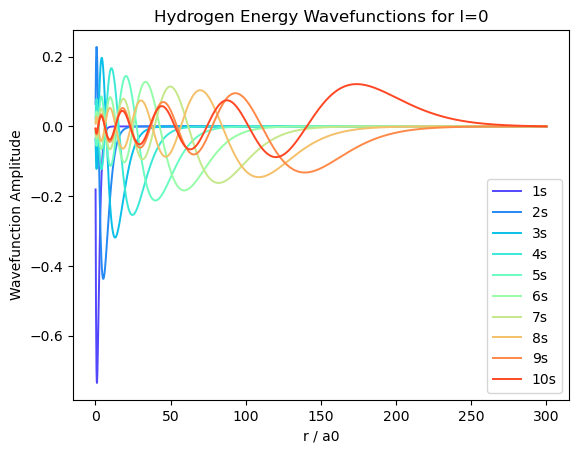

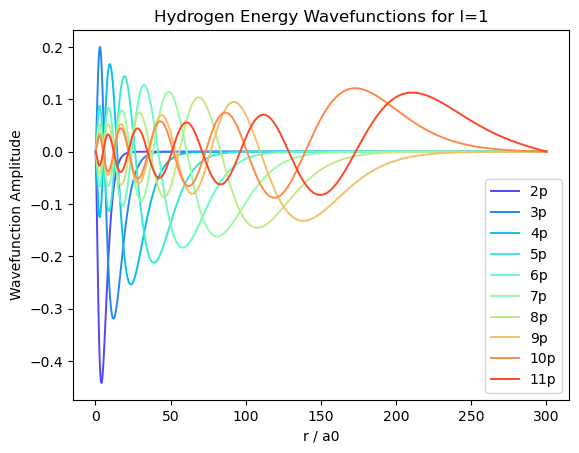

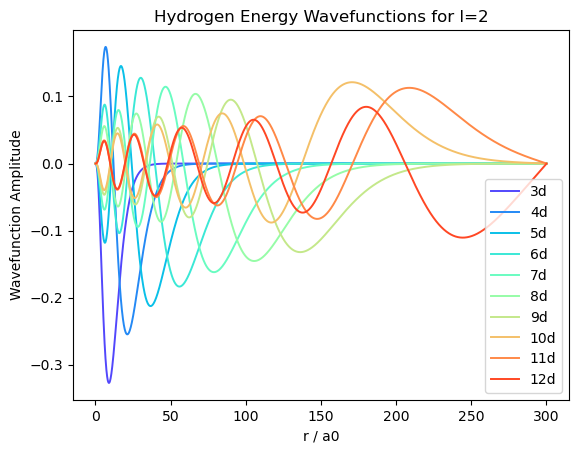

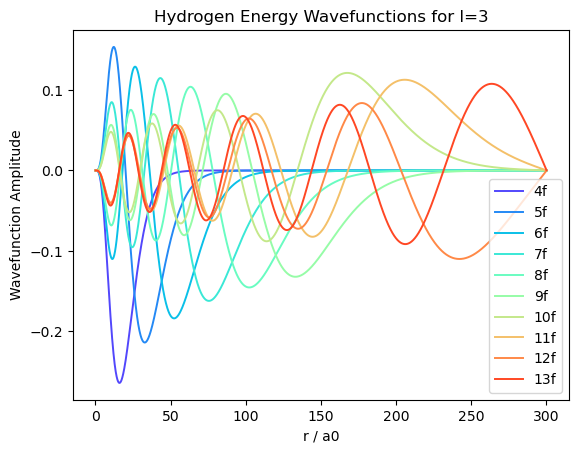

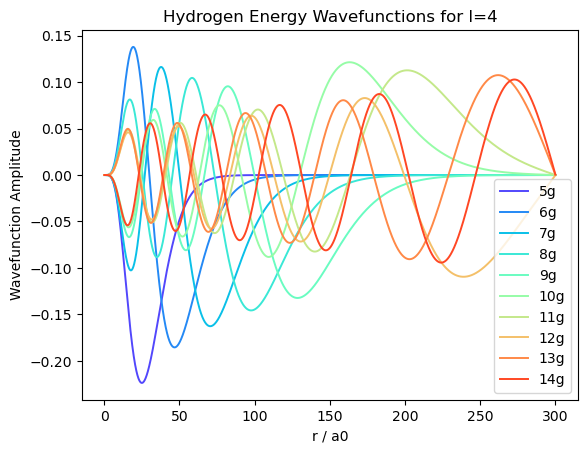

In [30]:
#==============================================================================
# Hydrogen Wavefunctions

num_wavefunc = 10

colors_array_2 = cm.rainbow(np.linspace(0, 1, num_wavefunc+2))  

norm_wavefuncs_H = []

for l in range(orbitals):          # looping over 5 values of l
    for i in range(num_wavefunc):  # looping over the first 10 eigenfunctions (which have the lowest E_n)
        # normalising wavefunctions 
        norm = H_eigenvectors_list[l][:,i] / np.sqrt( np.sum((np.abs(H_eigenvectors_list[l][:,i])**2)*dx_t ) )
        # storing the first ten normalised wavefunctions
        norm_wavefuncs_H.append(norm)

num=num_wavefunc

# plotting first 10 wavefuncs for l=0 to l=4
for l in range(orbitals):
    plt.figure()
    wavefunc_plot(l, num)
    plt.savefig(f"H_wavefunctions_l_{l}.png", bbox_inches="tight")
    plt.show

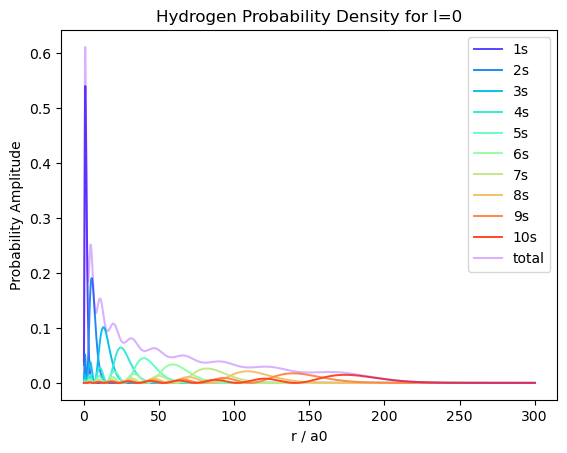

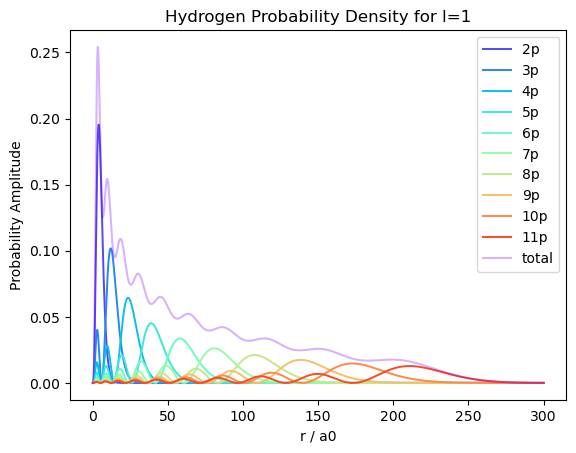

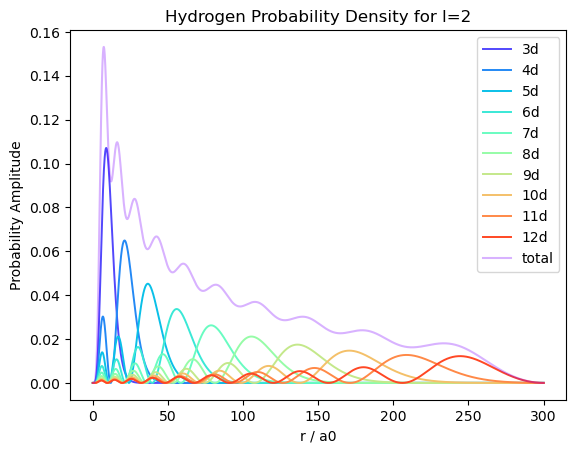

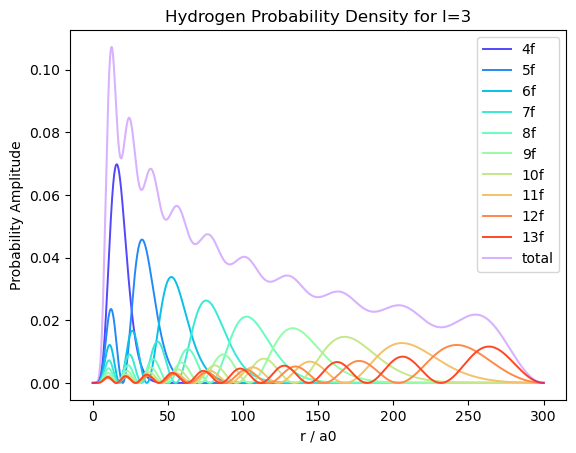

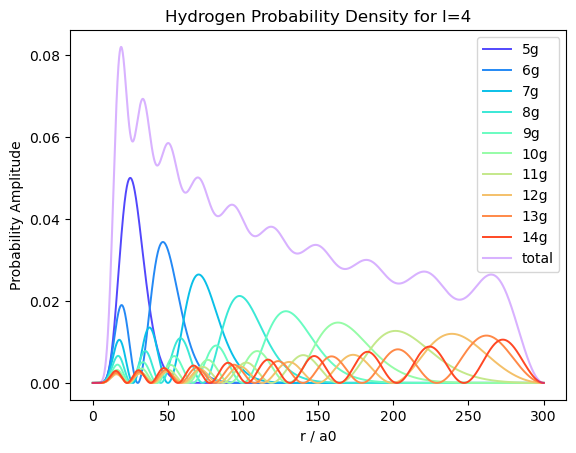

In [159]:
for l in range(orbitals):
    plt.figure()
    prob_density(l, num)
    plt.savefig(f"H_prob_density_l_{l}.png", bbox_inches="tight")
    plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

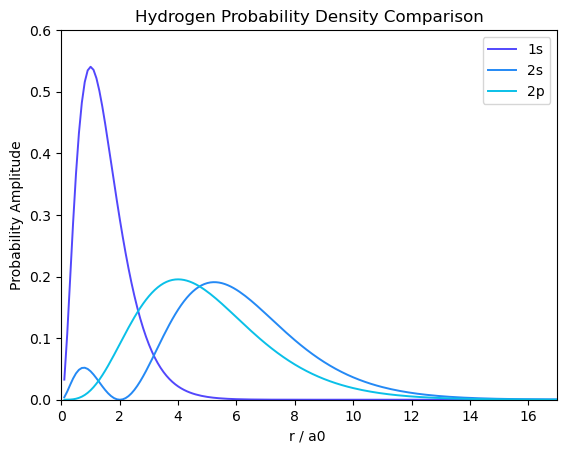

In [82]:
#====================================================================
# H probability density plot for validation

orbital = ("s", "p", "d", "f", "g")
num_comp = 2

for l in range(2):   
    # plot of top 'num' wavefunctions squared
    for i in range(num_comp):
        if i+l+1<3:
            if l == 1:
                plt.plot(x_t, (norm_wavefuncs_H[i+l*10])**2, linewidth=1.4, color = colors_array_2[i+3], label=f"{i+1+l}{orbital[l]}")
            else:
                plt.plot(x_t, (norm_wavefuncs_H[i+l*10])**2, linewidth=1.4, color = colors_array_2[i+1], label=f"{i+1+l}{orbital[l]}")


        
    plt.xlim(0,17)
    plt.ylim(0,0.6)
    plt.legend()
    plt.title(f"Hydrogen Probability Density Comparison")
    plt.xlabel("r / a0 ")
    plt.ylabel("Probability Amplitude")
plt.savefig(f"H_wavefunctions_comparison.png", bbox_inches="tight")
plt.show